<a href="https://colab.research.google.com/github/ribka-5/Bioinformatika/blob/main/Copy_of_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**


In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-11-11 12:52:19--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   217MB/s    in 0.4s    

2023-11-11 12:52:20 (217 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('TP53_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.00,inactive
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.00,inactive
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.00,inactive
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.00,inactive
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.00,inactive
...,...,...,...,...
1320,CHEMBL5179820,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...,11.00,active
1321,CHEMBL4169540,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...,72.00,active
1322,CHEMBL2313487,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...,10.60,active
1323,CHEMBL4095983,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...,7.85,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL179549,27000.00,inactive,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...
1,CHEMBL360920,66000.00,inactive,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...
2,CHEMBL182052,90000.00,inactive,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...
3,CHEMBL179662,85000.00,inactive,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...
4,CHEMBL181688,92000.00,inactive,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...
...,...,...,...,...
1320,CHEMBL5179820,11.00,active,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...
1321,CHEMBL4169540,72.00,active,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...
1322,CHEMBL2313487,10.60,active,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...
1323,CHEMBL4095983,7.85,active,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,572.822,7.17210,1.0,4.0
1,426.560,5.48100,1.0,2.0
2,445.515,4.26000,1.0,5.0
3,449.594,5.02930,3.0,3.0
4,461.605,7.05800,0.0,2.0
...,...,...,...,...
1320,772.765,6.70120,2.0,9.0
1321,516.558,1.58707,7.0,5.0
1322,502.592,5.49000,1.0,6.0
1323,523.633,5.29670,3.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,572.822,7.17210,1.0,4.0
1,426.560,5.48100,1.0,2.0
2,445.515,4.26000,1.0,5.0
3,449.594,5.02930,3.0,3.0
4,461.605,7.05800,0.0,2.0
...,...,...,...,...
1320,772.765,6.70120,2.0,9.0
1321,516.558,1.58707,7.0,5.0
1322,502.592,5.49000,1.0,6.0
1323,523.633,5.29670,3.0,5.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.00,inactive
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.00,inactive
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.00,inactive
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.00,inactive
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.00,inactive
...,...,...,...,...
1320,CHEMBL5179820,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...,11.00,active
1321,CHEMBL4169540,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...,72.00,active
1322,CHEMBL2313487,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...,10.60,active
1323,CHEMBL4095983,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...,7.85,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.00,inactive,572.822,7.17210,1.0,4.0
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.00,inactive,426.560,5.48100,1.0,2.0
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.00,inactive,445.515,4.26000,1.0,5.0
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.00,inactive,449.594,5.02930,3.0,3.0
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.00,inactive,461.605,7.05800,0.0,2.0
...,...,...,...,...,...,...,...,...
1320,CHEMBL5179820,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...,11.00,active,772.765,6.70120,2.0,9.0
1321,CHEMBL4169540,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...,72.00,active,516.558,1.58707,7.0,5.0
1322,CHEMBL2313487,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...,10.60,active,502.592,5.49000,1.0,6.0
1323,CHEMBL4095983,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...,7.85,active,523.633,5.29670,3.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    1.325000e+03
mean     2.736671e+04
std      9.408790e+04
min      6.100000e-02
25%      1.800000e+00
50%      4.400000e+01
75%      1.900000e+03
max      1.018000e+06
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-22-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,inactive,572.822,7.17210,1.0,4.0,27000.00
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,inactive,426.560,5.48100,1.0,2.0,66000.00
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,inactive,445.515,4.26000,1.0,5.0,90000.00
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,inactive,449.594,5.02930,3.0,3.0,85000.00
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,inactive,461.605,7.05800,0.0,2.0,92000.00
...,...,...,...,...,...,...,...,...
1320,CHEMBL5179820,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...,active,772.765,6.70120,2.0,9.0,11.00
1321,CHEMBL4169540,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...,active,516.558,1.58707,7.0,5.0,72.00
1322,CHEMBL2313487,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...,active,502.592,5.49000,1.0,6.0,10.60
1323,CHEMBL4095983,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...,active,523.633,5.29670,3.0,5.0,7.85


In [ ]:
df_norm.standard_value_norm.describe()

count    1.325000e+03
mean     2.736671e+04
std      9.408790e+04
min      6.100000e-02
25%      1.800000e+00
50%      4.400000e+01
75%      1.900000e+03
max      1.018000e+06
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-18-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,inactive,572.822,7.17210,1.0,4.0,4.568636
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,inactive,426.560,5.48100,1.0,2.0,4.180456
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,inactive,445.515,4.26000,1.0,5.0,4.045757
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,inactive,449.594,5.02930,3.0,3.0,4.070581
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,inactive,461.605,7.05800,0.0,2.0,4.036212
...,...,...,...,...,...,...,...,...
1320,CHEMBL5179820,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...,active,772.765,6.70120,2.0,9.0,7.958607
1321,CHEMBL4169540,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...,active,516.558,1.58707,7.0,5.0,7.142668
1322,CHEMBL2313487,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...,active,502.592,5.49000,1.0,6.0,7.974694
1323,CHEMBL4095983,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...,active,523.633,5.29670,3.0,5.0,8.105130


In [ ]:
df_final.pIC50.describe()

count    1325.000000
mean        7.119943
std         1.905305
min         2.992252
25%         5.721246
50%         7.356547
75%         8.744727
max        10.214670
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('TP53_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,inactive,572.822,7.17210,1.0,4.0,4.568636
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,inactive,426.560,5.48100,1.0,2.0,4.180456
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,inactive,445.515,4.26000,1.0,5.0,4.045757
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,inactive,449.594,5.02930,3.0,3.0,4.070581
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,inactive,461.605,7.05800,0.0,2.0,4.036212
...,...,...,...,...,...,...,...,...
1320,CHEMBL5179820,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...,active,772.765,6.70120,2.0,9.0,7.958607
1321,CHEMBL4169540,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...,active,516.558,1.58707,7.0,5.0,7.142668
1322,CHEMBL2313487,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...,active,502.592,5.49000,1.0,6.0,7.974694
1323,CHEMBL4095983,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...,active,523.633,5.29670,3.0,5.0,8.105130


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('TP53_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

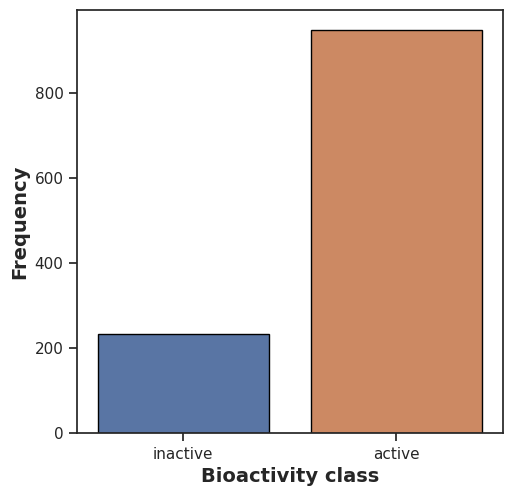

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

In [ ]:
print(sns.__version__)

0.12.2


In [ ]:
#!pip install seaborn==0.9.1

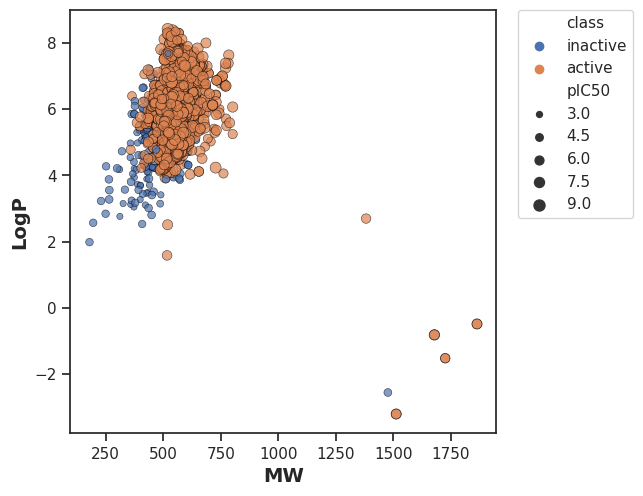

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

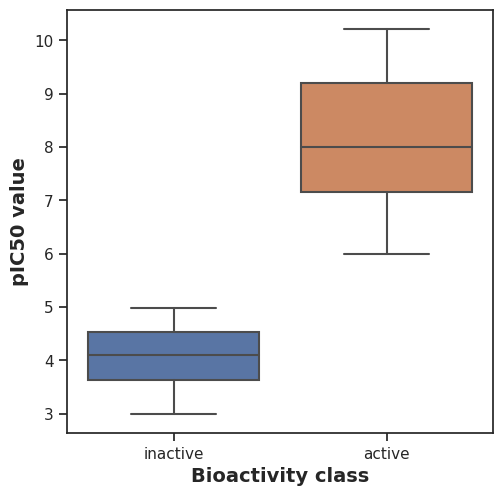

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,219704.0,1.669329e-123,0.05,Different distribution (reject H0)


#### **MW**

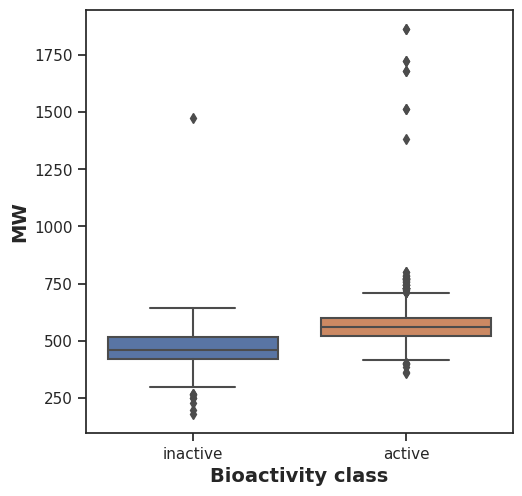

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,179693.0,4.971980e-51,0.05,Different distribution (reject H0)


#### **LogP**

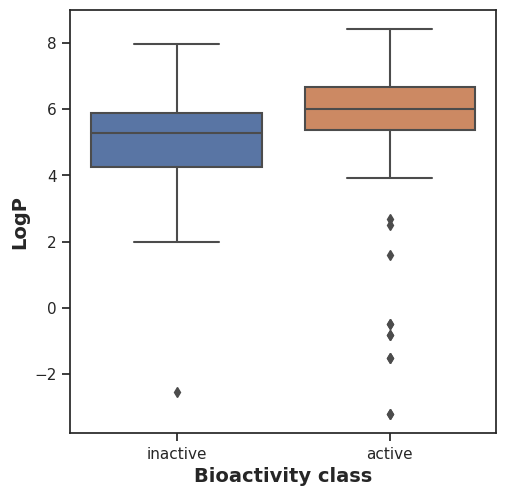

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,156016.0,3.026161e-23,0.05,Different distribution (reject H0)


#### **NumHDonors**

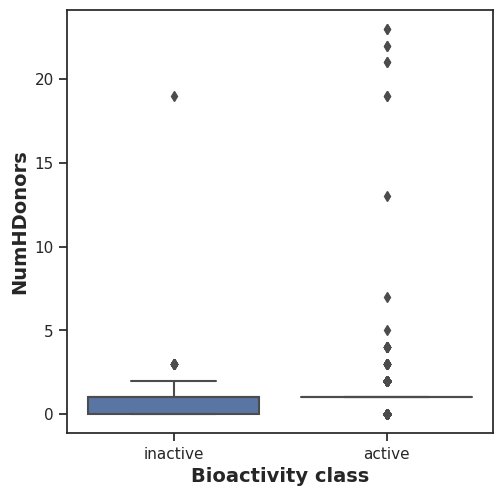

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,118526.0,0.041386,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

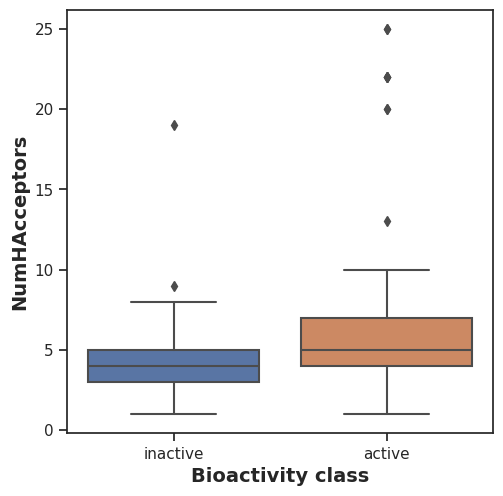

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,139757.0,5.827636e-11,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW.pdf (deflated 39%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: TP53_05_bioactivity_data_2class_pIC50.csv (deflated 81%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: TP53_03_bioactivity_data_curated.csv (deflated 87%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: TP53_04_bioactivity_data_3class_pIC50.csv (deflated 81%)
  adding: TP53_02_bioactivity_data_preprocessed.csv (deflated 86%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 81%)
